In [4]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ns

In [5]:
df = pd.read_csv('Diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: title={'center': 'Heatmap mencari null values\n'}>

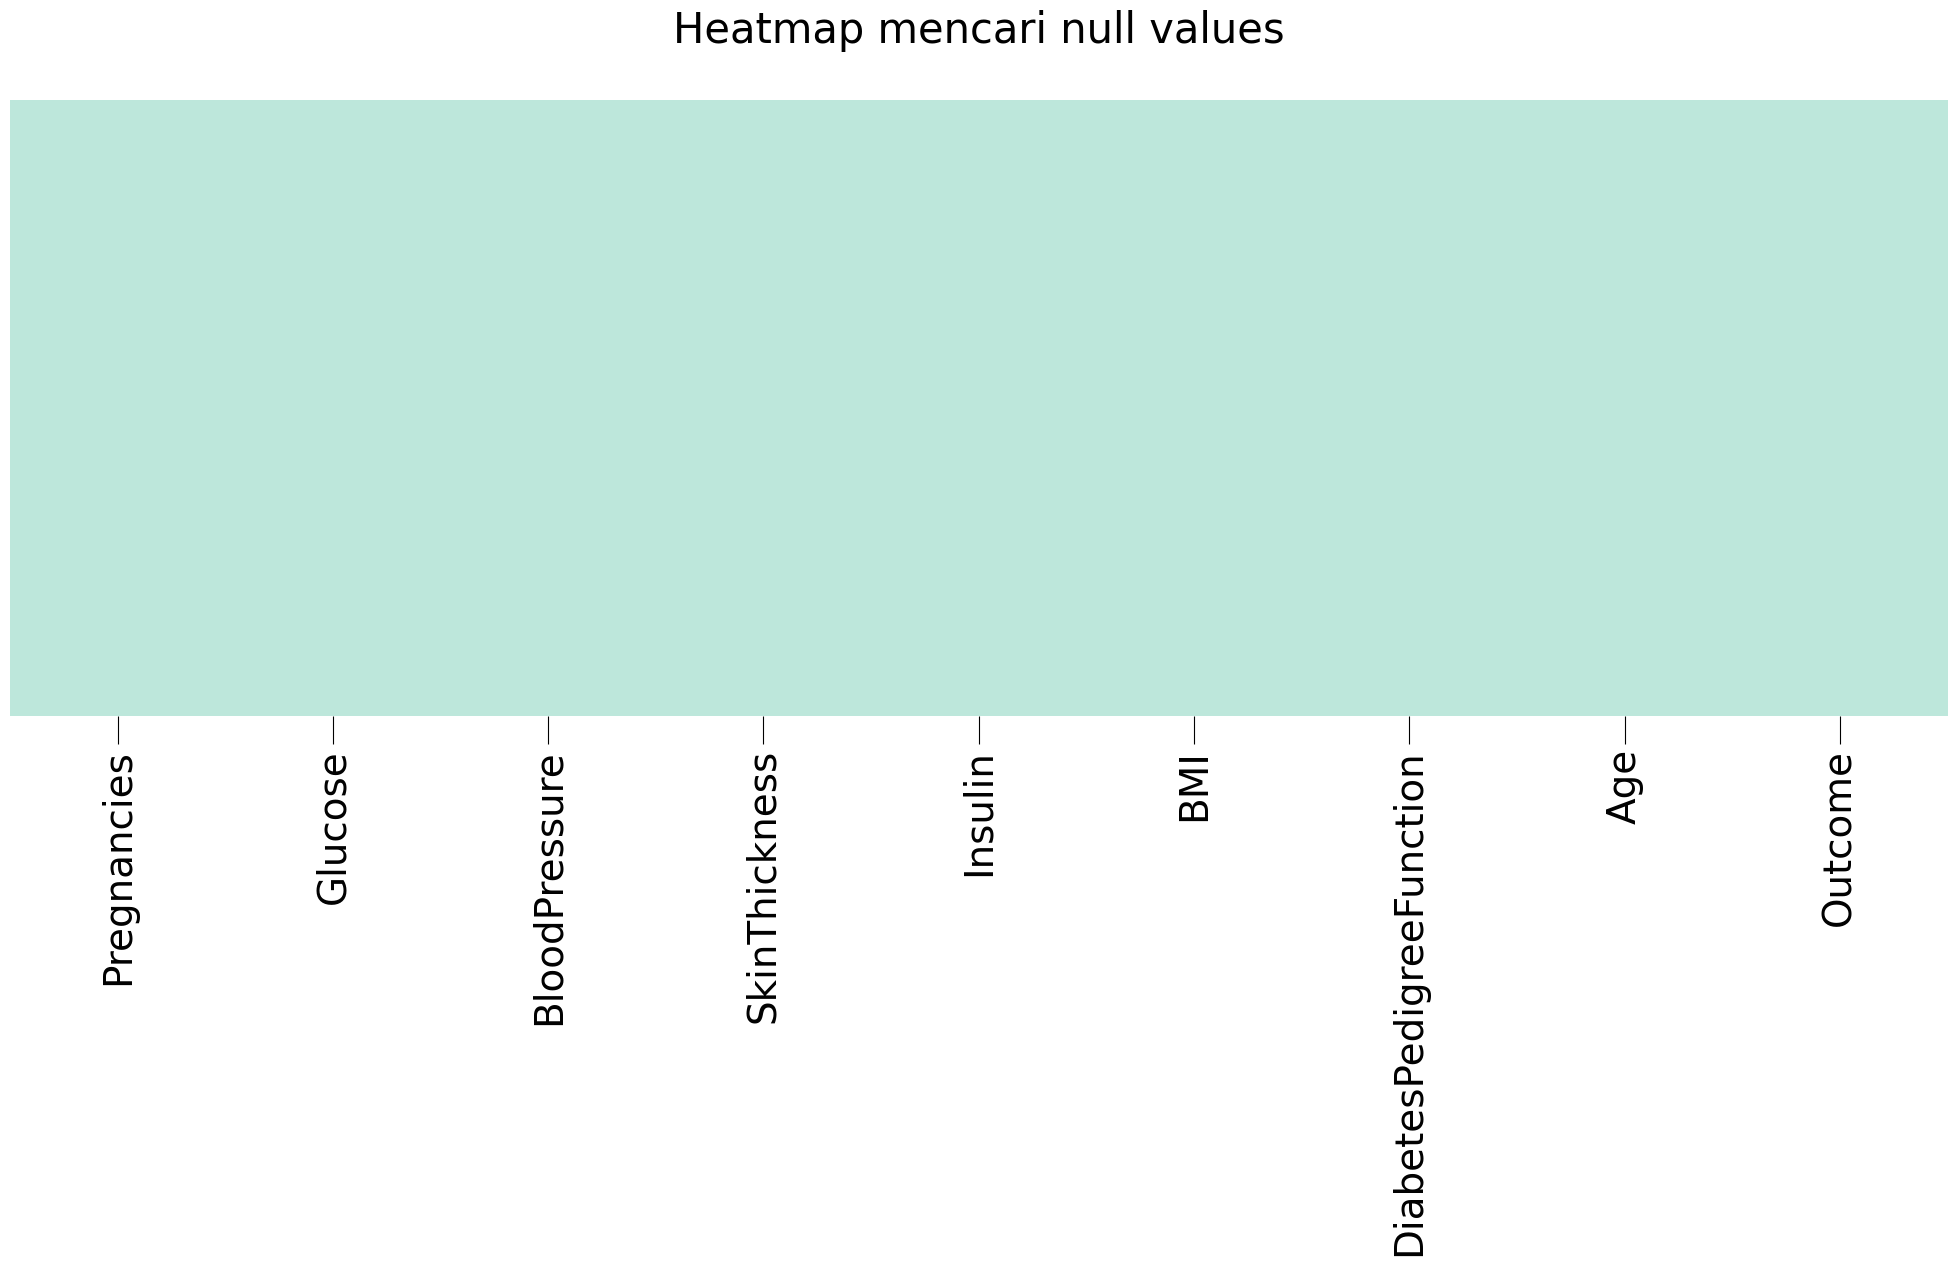

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24,8))
plt.xticks(size=28, color='black')
plt.tick_params(size=20, color='black')
plt.title('Heatmap mencari null values\n', color='black', size=30)
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='icefire',
           )

In [10]:
df[df.duplicated ()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [11]:
df.shape

(768, 9)

In [12]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [13]:
X=df.drop(['Outcome'],axis=1)
Y=df['Outcome']
X.shape, Y.shape

((768, 8), (768,))

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns =X.columns.values)
print (X)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

In [15]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [17]:
print(model.coef_)

NameError: name 'model' is not defined

In [ ]:
Y_pred = pd.Series(model.predict(X_test))
Y_test = Y_test.reset_index(drop=True)
z = pd.concat([Y_test, Y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head() 

,True,Prediction
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0


In [ ]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447


In [ ]:
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [ ]:
import plotly.express as px

def num_plot(df, col):
    fig = px.histogram(df, x=col, color="Outcome",
                       marginal="box")
    fig.update_layout(height=400, width=500, showlegend=True)
    fig.update_traces(marker_line_width=1, marker_line_color="black")
    fig.show()

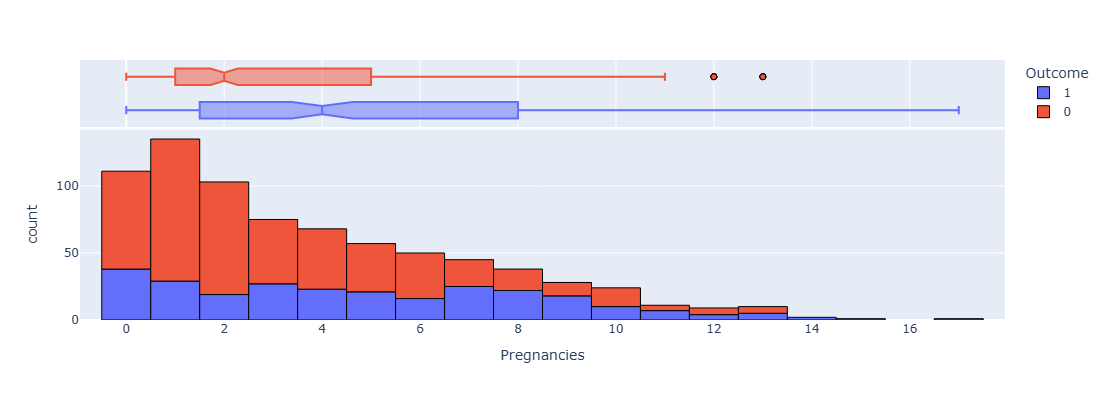

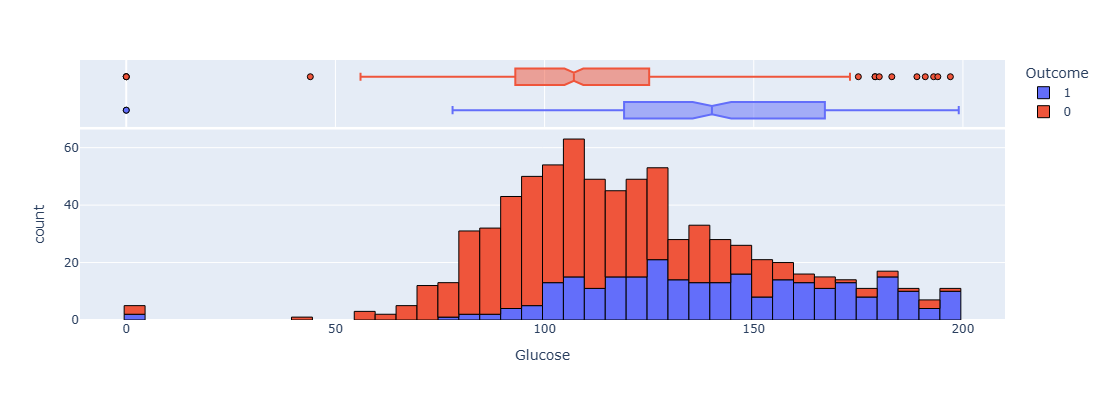

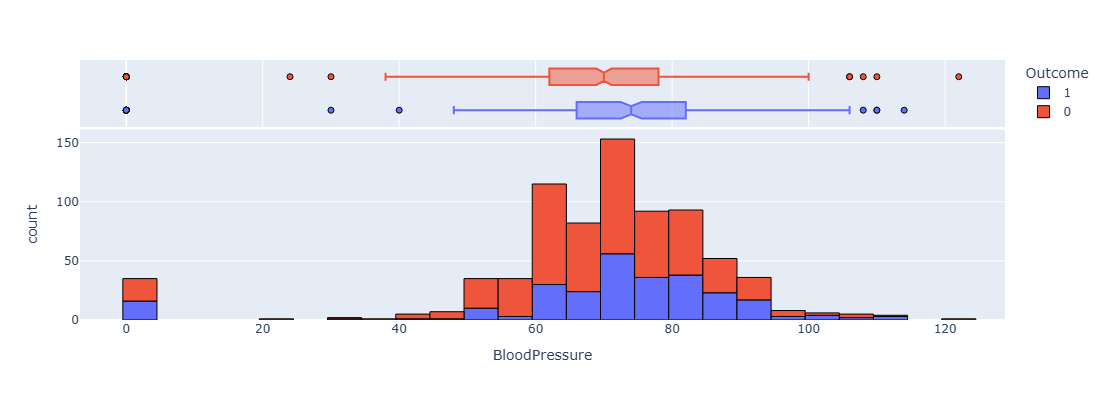

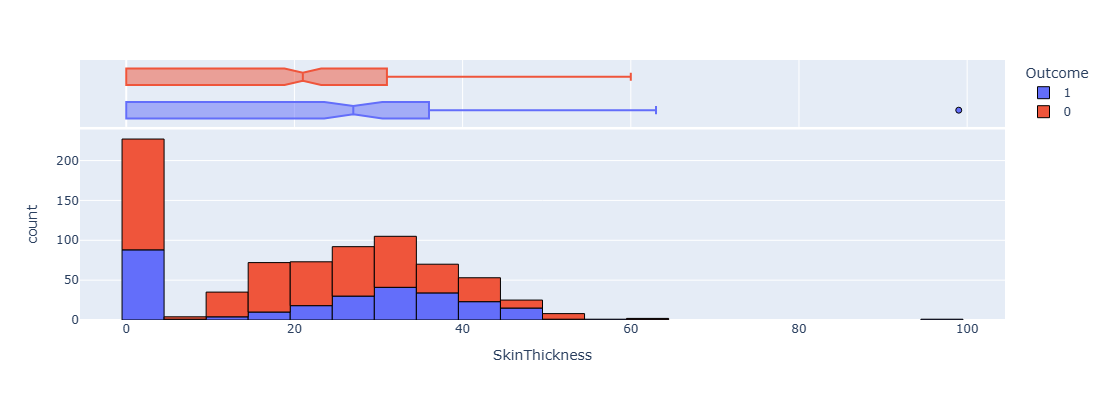

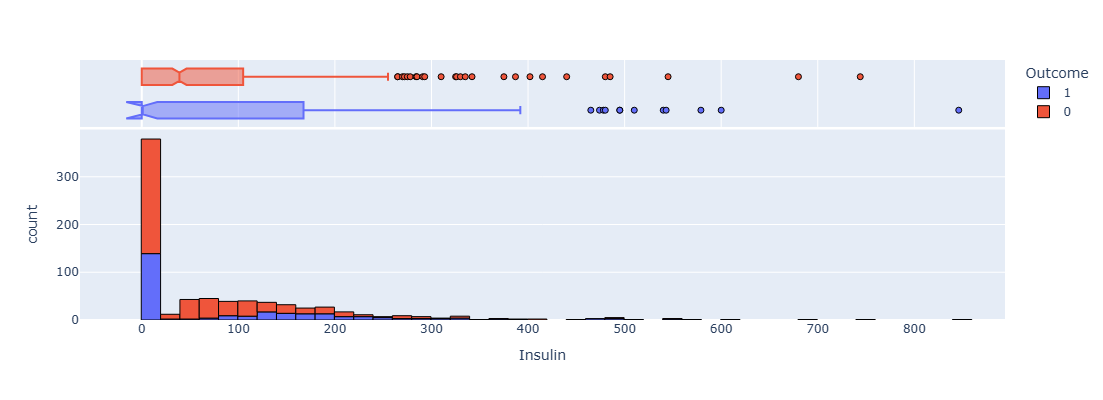

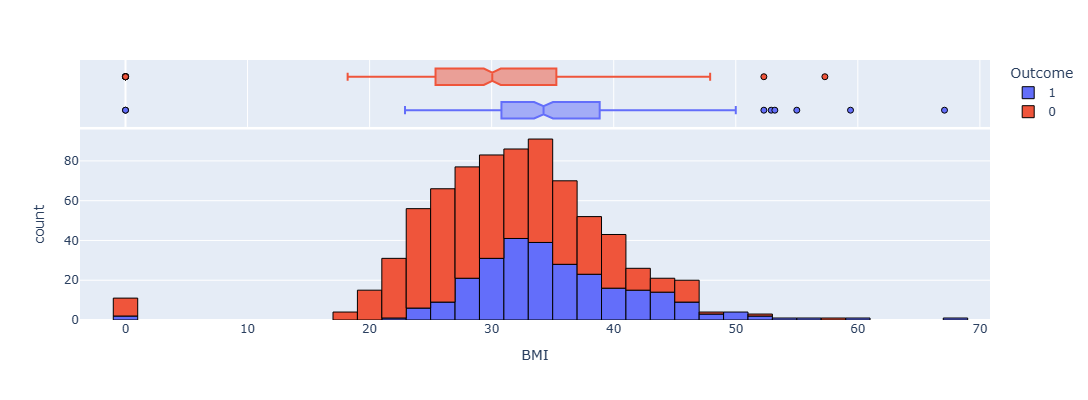

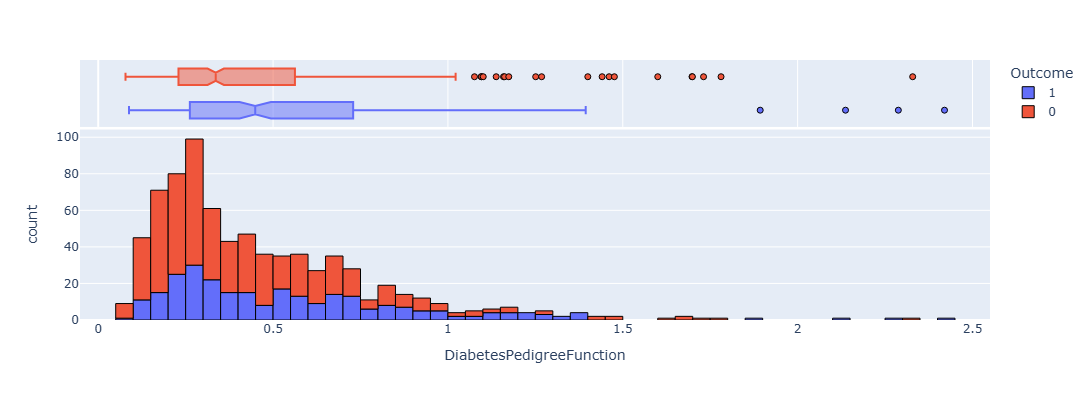

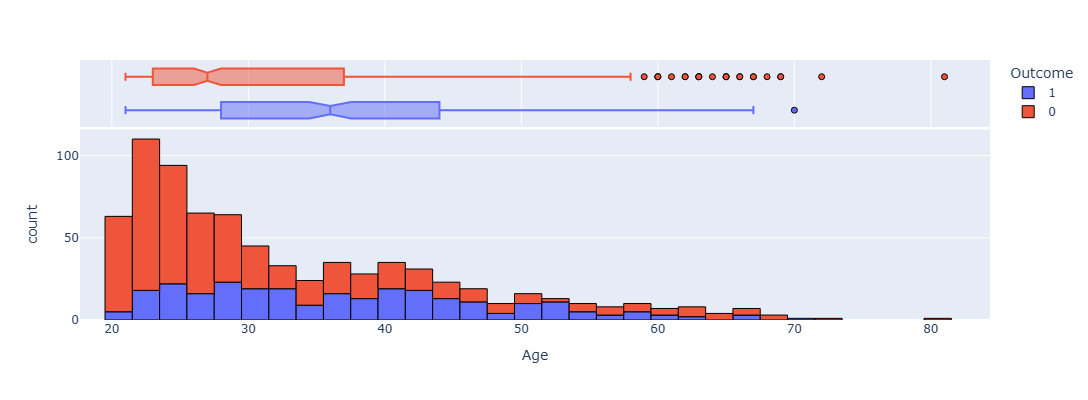

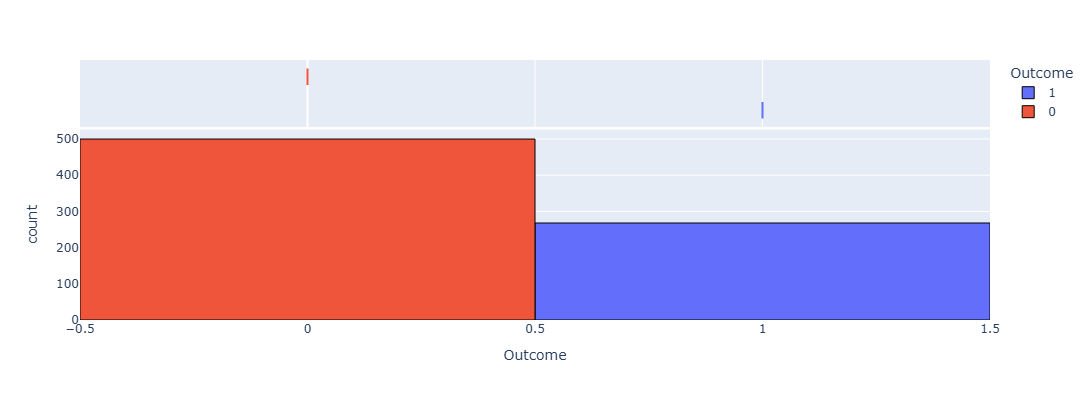

In [ ]:
for col in num_cols:
    num_plot(df,col)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Correlation Graph'}>

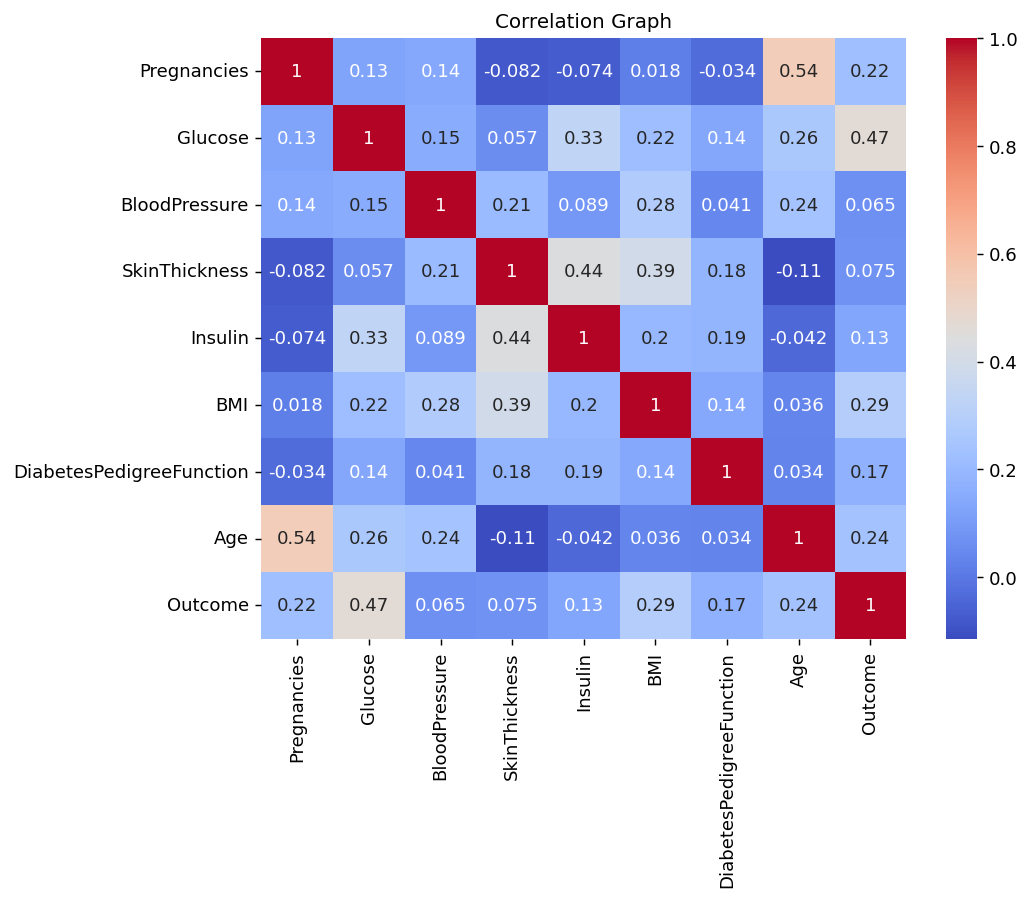

In [ ]:
plt.figure (figsize = [8, 6], dpi = 130)
plt.title ('Correlation Graph', fontsize = 11)
sns.heatmap (df.corr(), annot= True, cmap='coolwarm')

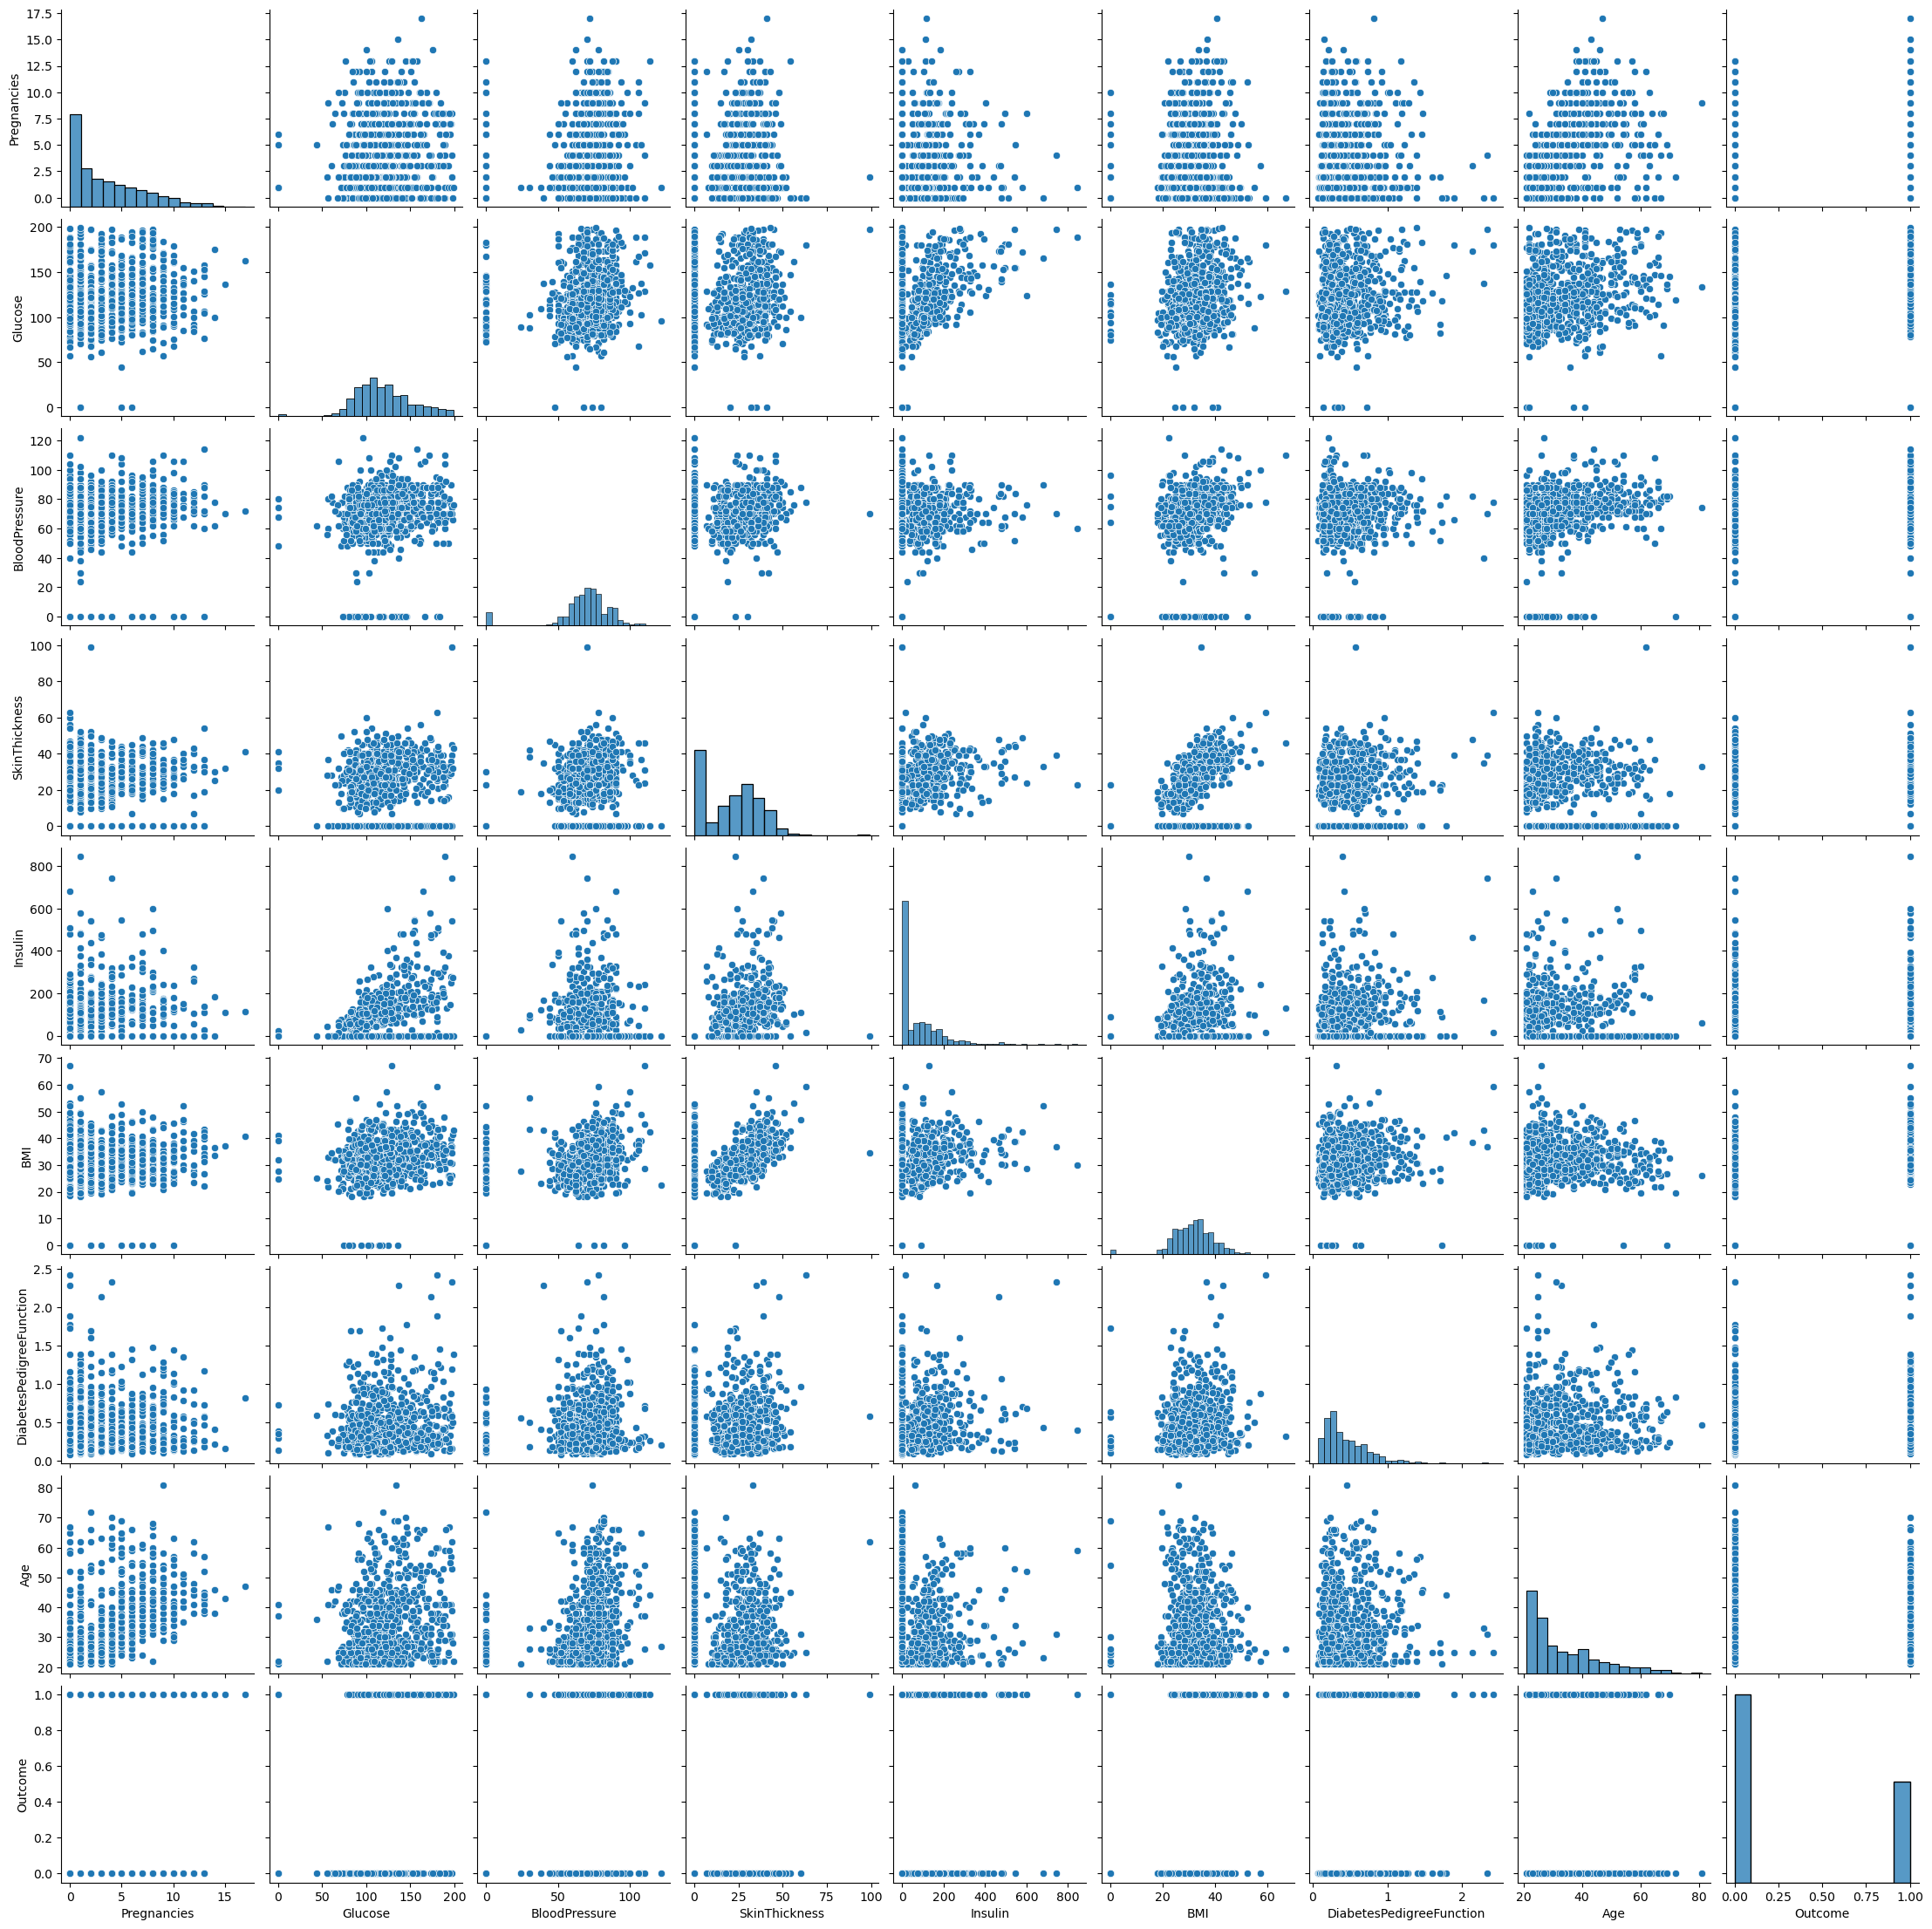

In [ ]:
sns.pairplot(df)

**UJI AKURASI DATASET**

In [ ]:
#model LogisticRegression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)  
print("Hasil Akurasi Logistic Regression : {:.2f}%".format(lr.score(X_test, Y_test) * 100))

Hasil Akurasi Logistic Regression : 82.47%


In [ ]:
#model KNeighbors

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2) 
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)
print("{} KNN  : {:.2f}%".format("Hasil", knn.score(X_test, Y_test) * 100))

Hasil KNN  : 76.62%


In [ ]:
scoreList = []
for i in range (1,20):
    knn2 =KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train, Y_train)
    scoreList.append(knn2.score(X_test, Y_test))
print("Hasil KNN maksimal : {:.2f}%".format((max(scoreList))* 100))

Hasil KNN maksimal : 81.82%


In [ ]:
#model Algoritma svm

from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, Y_train)
print("Hasil Akurasi SVM : {:.2f}%".format(svm.score(X_test, Y_test)* 100))

Hasil Akurasi SVM : 79.22%
